Welcome to initial exploration of the dataset. I am going to present basic information and sentiment analysis with vader.

In [83]:
import os
import pandas as pd

base_input_path = 'data/tweets_data_final'
subfolders = ['Konfa', 'NL', 'PIS', 'PO', 'PL2050', 'PSL']
output_folder = 'data/tweets_data_combined'

os.makedirs(output_folder, exist_ok=True)

#processing subsfolders
for subfolder in subfolders:
    folder_path = os.path.join(base_input_path, subfolder)
    dataframes = []
    
    for filename in os.listdir(folder_path):
        if filename.endswith('.json'):
            file_path = os.path.join(folder_path, filename)
            politician = filename.split("_tweets.json")[0]
            try:
                df = pd.read_json(file_path)  # Use lines=True for line-delimited JSON
                df["username"] = politician  # Add a column for the politician's username
                df["party"] = subfolder
                print(f"Read {len(df)} rows from {file_path}")  # Print the number of rows read
                dataframes.append(df)
            except ValueError as e:
                print(f"Error reading {file_path}: {e}")
    
    if dataframes:
        combined_df = pd.concat(dataframes, ignore_index=True)
        
        # Save combined DataFrame to a file
        output_file_path = os.path.join(output_folder, f'{subfolder}_combined.pkl')
        combined_df.to_pickle(output_file_path)  # You can also use .to_csv() for CSV format
        
        print(f"Saved {subfolder} combined data to {output_file_path}")

print("Processing complete!")

Read 950 rows from data/tweets_data_final/Konfa/Wlodek_Skalik_2023-10-16_2024-10-15.json
Read 721 rows from data/tweets_data_final/Konfa/SlawomirMentzen_2023-10-16_2024-10-15.json
Read 175 rows from data/tweets_data_final/Konfa/TudujKrzysztof_2023-10-16_2024-10-15.json
Read 964 rows from data/tweets_data_final/Konfa/bartlomiejpejo_2023-10-16_2024-10-15.json
Read 750 rows from data/tweets_data_final/Konfa/WTumanowicz_2023-10-16_2024-10-15.json
Saved Konfa combined data to data/tweets_data_combined/Konfa_combined.pkl
Read 457 rows from data/tweets_data_final/NL/RobertBiedron_2023-10-16_2024-10-15.json
Read 178 rows from data/tweets_data_final/NL/KGawkowski_2023-10-16_2024-10-15.json
Read 73 rows from data/tweets_data_final/NL/wlodekczarzasty_2023-10-16_2024-10-15.json
Read 0 rows from data/tweets_data_final/NL/DyduchMarek_2023-10-16_2024-10-15.json
Saved NL combined data to data/tweets_data_combined/NL_combined.pkl
Read 647 rows from data/tweets_data_final/PIS/MorawieckiM_2023-10-16_2024

In [84]:
df_konfa = pd.read_pickle(os.path.join(output_folder, 'Konfa_combined.pkl'))
df_NL = pd.read_pickle(os.path.join(output_folder, 'NL_combined.pkl'))
df_PIS = pd.read_pickle(os.path.join(output_folder, 'PIS_combined.pkl'))
df_PO = pd.read_pickle(os.path.join(output_folder, 'PO_combined.pkl'))
df_PL2050 = pd.read_pickle(os.path.join(output_folder, 'PL2050_combined.pkl'))
df_PSL = pd.read_pickle(os.path.join(output_folder, 'PSL_combined.pkl'))

In [85]:
df_konfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   id                      3560 non-null   int64              
 1   possibly_sensitive      3560 non-null   bool               
 2   in_reply_to_user_id     726 non-null    float64            
 3   created_at              3560 non-null   datetime64[ns, UTC]
 4   referenced_tweets       1055 non-null   object             
 5   edit_controls           3560 non-null   object             
 6   entities                3281 non-null   object             
 7   text                    3560 non-null   object             
 8   public_metrics          3560 non-null   object             
 9   edit_history_tweet_ids  3560 non-null   object             
 10  reply_settings          3560 non-null   object             
 11  author_id               3560 non-null   int

In [86]:
df_konfa['id'].nunique()

3555

In [87]:
# Merge all dataframes into one
df = pd.concat([df_konfa, df_NL, df_PIS, df_PO, df_PL2050, df_PSL], ignore_index=True)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12231 entries, 0 to 12230
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   id                      12231 non-null  float64            
 1   possibly_sensitive      12231 non-null  object             
 2   in_reply_to_user_id     1920 non-null   float64            
 3   created_at              12231 non-null  datetime64[ns, UTC]
 4   referenced_tweets       3522 non-null   object             
 5   edit_controls           12231 non-null  object             
 6   entities                10580 non-null  object             
 7   text                    12231 non-null  object             
 8   public_metrics          12231 non-null  object             
 9   edit_history_tweet_ids  12231 non-null  object             
 10  reply_settings          12231 non-null  object             
 11  author_id               12231 non-null  f

In [89]:
df['id'].nunique()

12171

In [90]:
# Remove duplicates from the dataframe based on specific columns
df.drop_duplicates(subset=['id'], inplace=True)


In [91]:
# df_konfa.drop_duplicates(subset=['id'], inplace=True)
# df_NL.drop_duplicates(subset=['id'], inplace=True)
# df_PIS.drop_duplicates(subset=['id'], inplace=True)
# df_PO.drop_duplicates(subset=['id'], inplace=True)
# df_PL2050.drop_duplicates(subset=['id'], inplace=True)
# df_PSL.drop_duplicates(subset=['id'], inplace=True)

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12171 entries, 0 to 12229
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   id                      12171 non-null  float64            
 1   possibly_sensitive      12171 non-null  object             
 2   in_reply_to_user_id     1909 non-null   float64            
 3   created_at              12171 non-null  datetime64[ns, UTC]
 4   referenced_tweets       3500 non-null   object             
 5   edit_controls           12171 non-null  object             
 6   entities                10527 non-null  object             
 7   text                    12171 non-null  object             
 8   public_metrics          12171 non-null  object             
 9   edit_history_tweet_ids  12171 non-null  object             
 10  reply_settings          12171 non-null  object             
 11  author_id               12171 non-null  float6

In [93]:
df.head()

,id,possibly_sensitive,in_reply_to_user_id,created_at,referenced_tweets,edit_controls,entities,text,public_metrics,edit_history_tweet_ids,reply_settings,author_id,lang,conversation_id,category,context_annotations,attachments,geo,username,party
0,1.846268e+18,False,509272614.0,2024-10-15 19:11:46+00:00,"[{'type': 'replied_to', 'id': '184615588116918...","{'edits_remaining': 5, 'is_edit_eligible': Fal...","{'mentions': [{'start': 0, 'end': 15, 'usernam...","@Dariusz_Jonski ""Ani kroku wstecz!"" - w przód ...","{'retweet_count': 0, 'reply_count': 1, 'like_c...",[1846267743022330183],everyone,1.187749e+18,pl,1.846156e+18,Reply,NaN,NaN,NaN,Wlodek_Skalik_2023-10-16_2024-10-15.json,Konfa
1,1.846265e+18,False,NaN,2024-10-15 18:59:59+00:00,NaN,"{'edits_remaining': 5, 'is_edit_eligible': Tru...",NaN,Właśnie zadzwonił do mnie nieznany numer. Już ...,"{'retweet_count': 28, 'reply_count': 9, 'like_...",[1846264777347117471],everyone,1.187749e+18,pl,1.846265e+18,Original,NaN,NaN,NaN,Wlodek_Skalik_2023-10-16_2024-10-15.json,Konfa
2,1.846263e+18,False,955239446.0,2024-10-15 18:51:42+00:00,"[{'type': 'replied_to', 'id': '184612763211236...","{'edits_remaining': 5, 'is_edit_eligible': Fal...","{'mentions': [{'start': 0, 'end': 15, 'usernam...","@KosiniakKamysz Czy ""jeszcze cięższa praca"" pr...","{'retweet_count': 4, 'reply_count': 1, 'like_c...",[1846262693394588154],everyone,1.187749e+18,pl,1.846128e+18,Reply,NaN,NaN,NaN,Wlodek_Skalik_2023-10-16_2024-10-15.json,Konfa
3,1.846261e+18,False,NaN,2024-10-15 18:46:20+00:00,"[{'type': 'quoted', 'id': '1846159669573689602'}]","{'edits_remaining': 5, 'is_edit_eligible': Tru...","{'urls': [{'start': 45, 'end': 68, 'url': 'htt...",Polecam się zapoznać z treścią konferencji 👇 h...,"{'retweet_count': 9, 'reply_count': 2, 'like_c...",[1846261341327446163],everyone,1.187749e+18,pl,1.846261e+18,Quote,"[{'domain': {'id': '10', 'name': 'Person', 'de...",NaN,NaN,Wlodek_Skalik_2023-10-16_2024-10-15.json,Konfa
4,1.846105e+18,False,NaN,2024-10-15 08:24:33+00:00,NaN,"{'edits_remaining': 5, 'is_edit_eligible': Tru...","{'urls': [{'start': 277, 'end': 300, 'url': 'h...",❌Kilka dni temu zagłosowałem za odwołaniem Krz...,"{'retweet_count': 30, 'reply_count': 0, 'like_...",[1846104865829015639],everyone,1.187749e+18,pl,1.846105e+18,Original,"[{'domain': {'id': '47', 'name': 'Brand', 'des...",{'media_keys': ['3_1846104848942432256']},NaN,Wlodek_Skalik_2023-10-16_2024-10-15.json,Konfa


In [94]:
# Update the 'username' column to keep only the string until '_2'
df['username'] = df['username'].str.split('_2').str[0]

In [95]:
category_summary = df['category'].value_counts()
print(category_summary)
total_tweets = category_summary.sum()
print(f"Total tweets: {total_tweets}")

category
Original    8639
Reply       1882
Quote       1459
Retweet      191
Name: count, dtype: int64
Total tweets: 12171


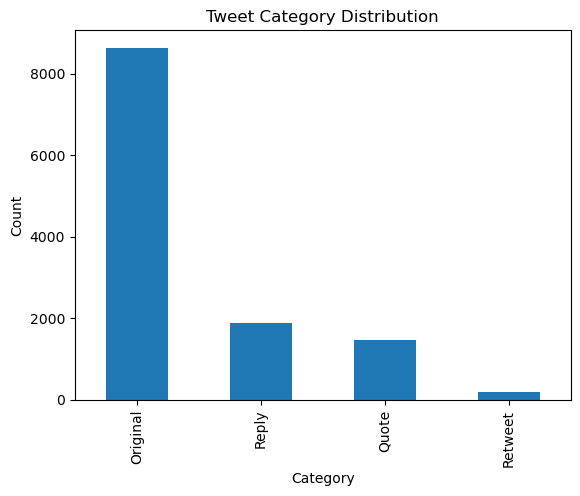

In [96]:
import matplotlib.pyplot as plt

# Plot the category summary as a bar plot
category_summary.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Tweet Category Distribution')
plt.show()

Top 10 active users

In [81]:
top_ten_users = df['username'].value_counts().head(10)
print(top_ten_users)

username
PatrykJaki         1023
bartlomiejpejo      963
Wlodek_Skalik       949
mwojcik_            781
WTumanowicz         749
SlawomirMentzen     720
MorawieckiM         646
BeataSzydlo         555
jbrudzinski         506
OklaDrewnowicz      455
Name: count, dtype: int64


Top 10 active users (only original posts)

In [103]:
# Filter the dataframe to include only original posts
original_posts_df = df[df['category'] == 'Original']

# Get the top ten users based on the number of original posts
top_ten_original_users = original_posts_df['username'].value_counts().head(10)
print(top_ten_original_users)

username
bartlomiejpejo     835
mwojcik_           646
PatrykJaki         638
MorawieckiM        563
SlawomirMentzen    556
Wlodek_Skalik      521
BeataSzydlo        510
WTumanowicz        490
KosiniakKamysz     403
RobertBiedron      388
Name: count, dtype: int64


the most active user from each party

In [104]:
most_active_users = df.groupby('party')['username'].agg(lambda x: x.value_counts().idxmax())
tweet_counts = df.groupby(['party', 'username']).size().reset_index(name='counts')
most_active_users_with_counts = most_active_users.reset_index().merge(tweet_counts, on=['party', 'username'])
print(most_active_users_with_counts)

    party        username  counts
0   Konfa  bartlomiejpejo     963
1      NL   RobertBiedron     452
2     PIS      PatrykJaki    1023
3  PL2050     Kpelczynska     225
4      PO  OklaDrewnowicz     455
5     PSL  KosiniakKamysz     408


In [106]:
most_active_users = original_posts_df.groupby('party')['username'].agg(lambda x: x.value_counts().idxmax())
tweet_counts = df.groupby(['party', 'username']).size().reset_index(name='counts')
most_active_users_with_counts = most_active_users.reset_index().merge(tweet_counts, on=['party', 'username'])
print(most_active_users_with_counts)


    party        username  counts
0   Konfa  bartlomiejpejo     963
1      NL   RobertBiedron     452
2     PIS        mwojcik_     781
3  PL2050     Kpelczynska     225
4      PO      donaldtusk     337
5     PSL  KosiniakKamysz     408


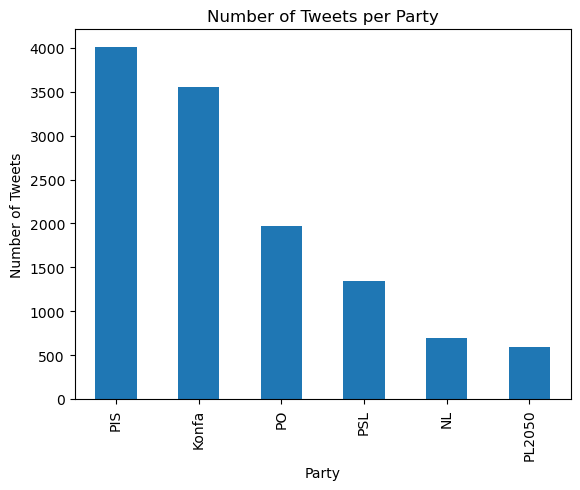

In [107]:
import matplotlib.pyplot as plt

# Group by party and count the number of tweets
tweets_per_party = df['party'].value_counts()

# Plot the data
tweets_per_party.plot(kind='bar')
plt.xlabel('Party')
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets per Party')
plt.show()

In [ ]:
# Ensure the created_at column is in datetime format
df['created_at'] = pd.to_datetime(df['created_at'])

# Set the created_at column as the index
df.set_index('created_at', inplace=True)

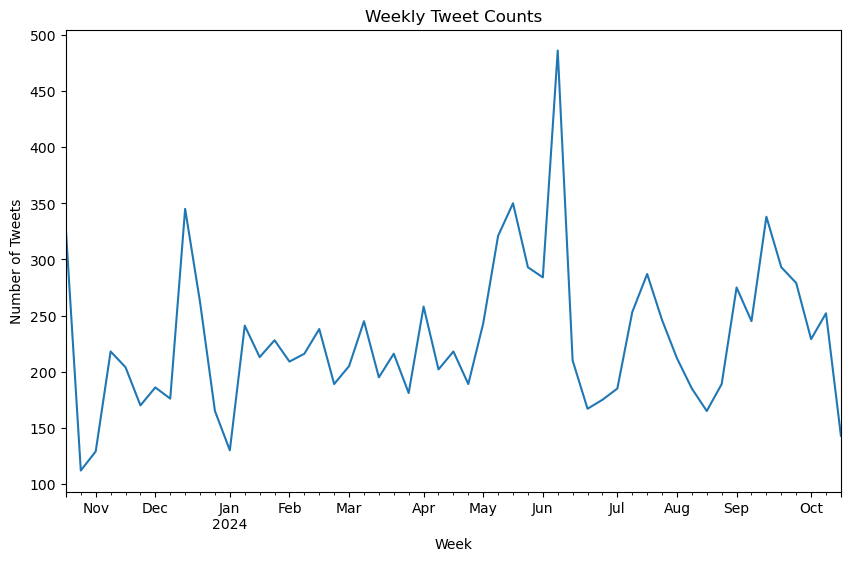

In [118]:


# Resample the data weekly and count the number of tweets per week
weekly_tweets = df.resample('W').size()

# Plot the weekly tweet counts
weekly_tweets.plot(kind='line', figsize=(10, 6))
plt.xlabel('Week')
plt.ylabel('Number of Tweets')
plt.title('Weekly Tweet Counts')
plt.show()

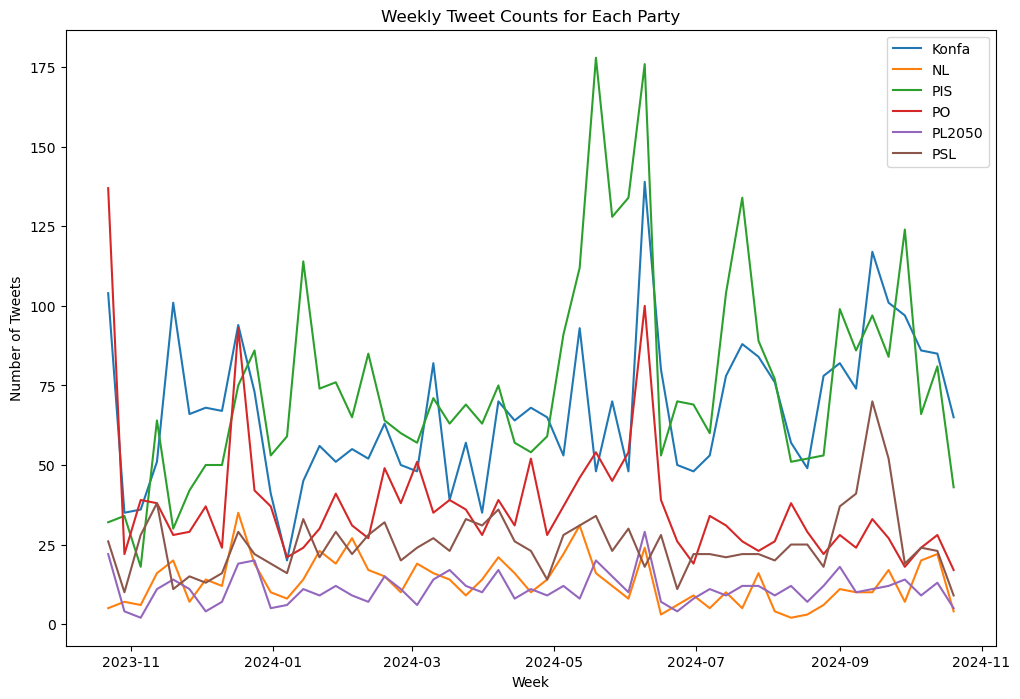

In [113]:
parties = df['party'].unique()

# Plot weekly tweet counts for each party on one plot
plt.figure(figsize=(12, 8))

for party in parties:
    party_df = df[df['party'] == party]
    weekly_tweets = party_df.resample('W').size()
    plt.plot(weekly_tweets, label=party)

plt.xlabel('Week')
plt.ylabel('Number of Tweets')
plt.title('Weekly Tweet Counts for Each Party')
plt.legend()
plt.show()